In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

**Unemployment**

In [2]:
unemployment = pd.read_csv('../../data/interim/Unemployment_By_County_2013_to_2019.csv')
venues  = pd.read_csv('../../data/interim/CRYTO_VENUES_USA.csv')


In [3]:
unemployment.head(1)

,state,county,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,Alabama,Autauga,25810,24205,1605,6.2,25592,24097,1495,5.8,25652,24321,1331,5.2,26031,24709,1322,5.1,26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7,58233,112


<AxesSubplot:ylabel='Frequency'>

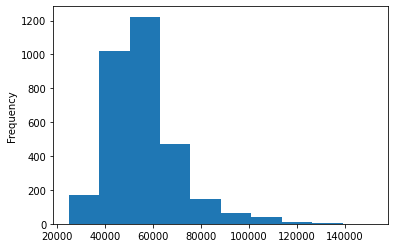

In [4]:
unemployment['Median_Household_Income_2019'].plot(kind='hist')

In [5]:
venues.head(1)

,state,county,lat,lon,year,category
0,California,Nevada,39.261575,-121.016567,2013,default


<AxesSubplot:ylabel='Frequency'>

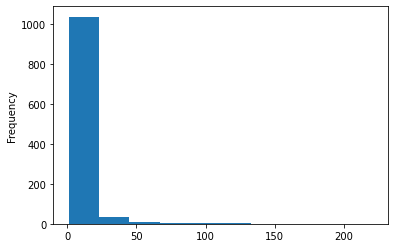

In [6]:
venues.groupby(['state', 'county']).size().plot(kind='hist')

In [7]:
## Calculate average unemployment rate for 2013-2019 for each county 
unemployment['unemployment_rate_avg'] = (unemployment['Unemployment_rate_2013'] + unemployment['Unemployment_rate_2014'] + unemployment['Unemployment_rate_2015'] + unemployment['Unemployment_rate_2016'] + unemployment['Unemployment_rate_2017'] + unemployment['Unemployment_rate_2018'] + unemployment['Unemployment_rate_2019'] ) / 7

In [8]:
## merge venue and unemployment datframes on county column. Counties with no record of a venue accepting crypto will have a NaN value
ue_venue = unemployment.merge(venues, on=['state','county'], how='left')

In [9]:
ue_venue

,state,county,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,unemployment_rate_avg,lat,lon,year,category
0,Alabama,Autauga,25810,24205,1605,6.2,25592,24097,1495,5.8,25652,24321,1331,5.2,26031,24709,1322,5.1,26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7,58233,112,4.642857,32.459850,-86.475314,2017.0,shopping
1,Alabama,Autauga,25810,24205,1605,6.2,25592,24097,1495,5.8,25652,24321,1331,5.2,26031,24709,1322,5.1,26075,25062,1013,3.9,26196,25261,935,3.6,26172,25458,714,2.7,58233,112,4.642857,32.464614,-86.450161,2021.0,atm
2,Alabama,Baldwin,85280,79626,5654,6.6,86384,81083,5301,6.1,87872,83010,4862,5.5,90895,86060,4835,5.3,92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115,4.842857,30.583876,-87.898264,2018.0,shopping
3,Alabama,Baldwin,85280,79626,5654,6.6,86384,81083,5301,6.1,87872,83010,4862,5.5,90895,86060,4835,5.3,92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115,4.842857,30.665844,-87.847356,2014.0,food
4,Alabama,Baldwin,85280,79626,5654,6.6,86384,81083,5301,6.1,87872,83010,4862,5.5,90895,86060,4835,5.3,92456,88711,3745,4.1,95233,91809,3424,3.6,97328,94675,2653,2.7,59871,115,4.842857,30.641848,-87.911491,2021.0,atm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8109,Wyoming,Sweetwater,23883,22838,1045,4.4,23262,22335,927,4.0,22745,21664,1081,4.8,22125,20782,1343,6.1,21565,20591,974,4.5,21285,20425,860,4.0,21274,20446,828,3.9,80639,121,4.528571,NaN,NaN,NaN,NaN
8110,Wyoming,Teton,14107,13318,789,5.6,14419,13751,668,4.6,14694,14119,575,3.9,15237,14708,529,3.5,15428,14994,434,2.8,15405,14959,446,2.9,15575,15151,424,2.7,98837,149,3.714286,43.424848,-110.775947,2014.0,default
8111,Wyoming,Uinta,9960,9435,525,5.3,9870,9396,474,4.8,9675,9186,489,5.1,9420,8871,549,5.8,9108,8695,413,4.5,9028,8650,378,4.2,9035,8682,353,3.9,70756,106,4.800000,NaN,NaN,NaN,NaN
8112,Wyoming,Washakie,4362,4146,216,5.0,4271,4086,185,4.3,4267,4087,180,4.2,4212,4011,201,4.8,4114,3950,164,4.0,4058,3892,166,4.1,3941,3786,155,3.9,55122,83,4.328571,NaN,NaN,NaN,NaN


In [10]:
## remove columns that I want to keep from array of column names that will be used to drop unwanted columns
df_columns = ue_venue.columns
df_columns = list(df_columns)
df_columns.remove('state')
df_columns.remove('county')
df_columns.remove('unemployment_rate_avg')
df_columns.remove('category')
df_columns.remove('Median_Household_Income_2019')
df_columns

['Civilian_labor_force_2013',
 'Employed_2013',
 'Unemployed_2013',
 'Unemployment_rate_2013',
 'Civilian_labor_force_2014',
 'Employed_2014',
 'Unemployed_2014',
 'Unemployment_rate_2014',
 'Civilian_labor_force_2015',
 'Employed_2015',
 'Unemployed_2015',
 'Unemployment_rate_2015',
 'Civilian_labor_force_2016',
 'Employed_2016',
 'Unemployed_2016',
 'Unemployment_rate_2016',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Civilian_labor_force_2019',
 'Employed_2019',
 'Unemployed_2019',
 'Unemployment_rate_2019',
 'Med_HH_Income_Percent_of_State_Total_2019',
 'lat',
 'lon',
 'year']

In [11]:
## drop columns 
df = ue_venue.drop(columns=df_columns)

In [12]:
## select all rows from merged dataframe that has a crytpo venue 
has_venue = df.loc[df['category'].isnull() == False]
## group by county and state to determine how many venues each county has
has_venue_by_county =has_venue.groupby(['state', 'county']).size().to_frame()
## merge with unemployment dataframe
ue_venues_county = unemployment.merge(has_venue_by_county, on='county', how='left')

## drop unwanted columns

# df_columns.remove('state_y')
df_columns.remove('lat')
df_columns.remove('lon')
df_columns.remove('year')

ue_venues_county = ue_venues_county.drop(columns=df_columns).drop_duplicates(subset=['state', 'county'])
ue_venues_county


,state,county,Median_Household_Income_2019,unemployment_rate_avg,0
0,Alabama,Autauga,58233,4.642857,2.0
1,Alabama,Baldwin,59871,4.842857,3.0
2,Alabama,Barbour,35972,7.514286,NaN
3,Alabama,Bibb,47918,5.642857,3.0
4,Alabama,Blount,52902,4.771429,NaN
...,...,...,...,...,...
6288,Wyoming,Sweetwater,80639,4.528571,NaN
6289,Wyoming,Teton,98837,3.714286,1.0
6291,Wyoming,Uinta,70756,4.800000,NaN
6292,Wyoming,Washakie,55122,4.328571,NaN


In [13]:
## fill rows that didn't have a crypto venue when merged earlier to 0 instead of NaN
ue_venues_county = ue_venues_county.fillna(0)
# rename column 
ue_venues_county = ue_venues_county.rename(columns={0:'num_venues'})
# cast column as integer 
ue_venues_county['num_venues'] = ue_venues_county['num_venues'].astype(int)
ue_venues_county

,state,county,Median_Household_Income_2019,unemployment_rate_avg,num_venues
0,Alabama,Autauga,58233,4.642857,2
1,Alabama,Baldwin,59871,4.842857,3
2,Alabama,Barbour,35972,7.514286,0
3,Alabama,Bibb,47918,5.642857,3
4,Alabama,Blount,52902,4.771429,0
...,...,...,...,...,...
6288,Wyoming,Sweetwater,80639,4.528571,0
6289,Wyoming,Teton,98837,3.714286,1
6291,Wyoming,Uinta,70756,4.800000,0
6292,Wyoming,Washakie,55122,4.328571,0


In [14]:
## Save to csv for later use

df3 = ue_venues_county.drop(columns=['Median_Household_Income_2019', 'unemployment_rate_avg' ]) 
df3.to_csv('../../data/interim/VENUES_PER_COUNTY.csv', index=False)

Text(0, 0.5, 'Number of Venues')

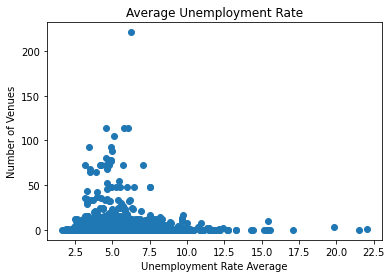

In [15]:
plt.scatter(ue_venues_county['unemployment_rate_avg'], ue_venues_county['num_venues'])
plt.title('Average Unemployment Rate')
plt.xlabel('Unemployment Rate Average')
plt.ylabel('Number of Venues')

Text(0, 0.5, 'Number of Venues')

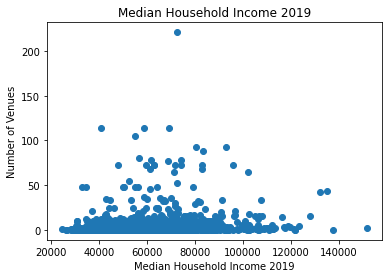

In [16]:
plt.scatter(ue_venues_county['Median_Household_Income_2019'], ue_venues_county['num_venues'])
plt.title('Median Household Income 2019')
plt.xlabel('Median Household Income 2019')
plt.ylabel('Number of Venues')

Text(0, 0.5, 'Total Venues')

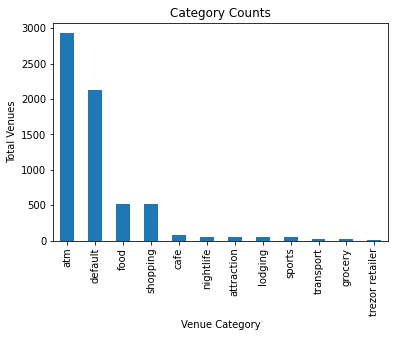

In [31]:
venues['category'].value_counts().plot.bar()
plt.title('Category Counts')
plt.xlabel('Venue Category')
plt.ylabel('Total Venues')

#venues.plot.bar(x=venues.category, y=venues['category'].value_counts())

In [22]:
ue_venues_county.corr()

,Median_Household_Income_2019,unemployment_rate_avg,num_venues
Median_Household_Income_2019,1.000000,-0.427724,0.174011
unemployment_rate_avg,-0.427724,1.000000,-0.036153
num_venues,0.174011,-0.036153,1.000000


It seems there isn't any correlation between the unemployment rate avergae or median household income and the number of venues accepting cyrptocurrency. Since crypto is still new let's check out the data just from 2019 to see if this holds. My guess is that during earlier years people with jobs and disposable income were hesitant to engage with crypto due to lack of knoweldge with it being so new and different from traditional financial systems. Only early adapters would have been using crypto and not the more general population.   

In [18]:

# df_columns.remove('state')
# df_columns.remove('county')
# df_columns.remove('Median_Household_Income_2019')
df_columns.remove('Unemployment_rate_2019')


